# Analysis of Chicago Crime Data, 2001 to 2018 (so far...)

### Load libraries and import data

In [88]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(ggthemes)
library(viridis)
library(tidyr)
library(lubridate)
library(plotly)
library(ggcorrplot)

In [2]:
Chi_crimes <- readRDS("/home/ferrous/Crime_Case_Study_Data/Chi_crimes.rds")

# Total crime counts by year

In [3]:
year_count <- Chi_crimes %>%
group_by(Year) %>%
summarise(Count = n()) %>%
arrange(desc(Count))

year_count

Year Count 
1  2003 471994
2  2004 467133
3  2005 449872
4  2006 445500
5  2007 435531
6  2008 419783
7  2009 385833
8  2010 369792
9  2011 351112
10 2002 345013
11 2012 335397
12 2013 306338
13 2014 273711
14 2016 267228
15 2017 265023
16 2015 257886
17 2018 117858
18 2001   3851

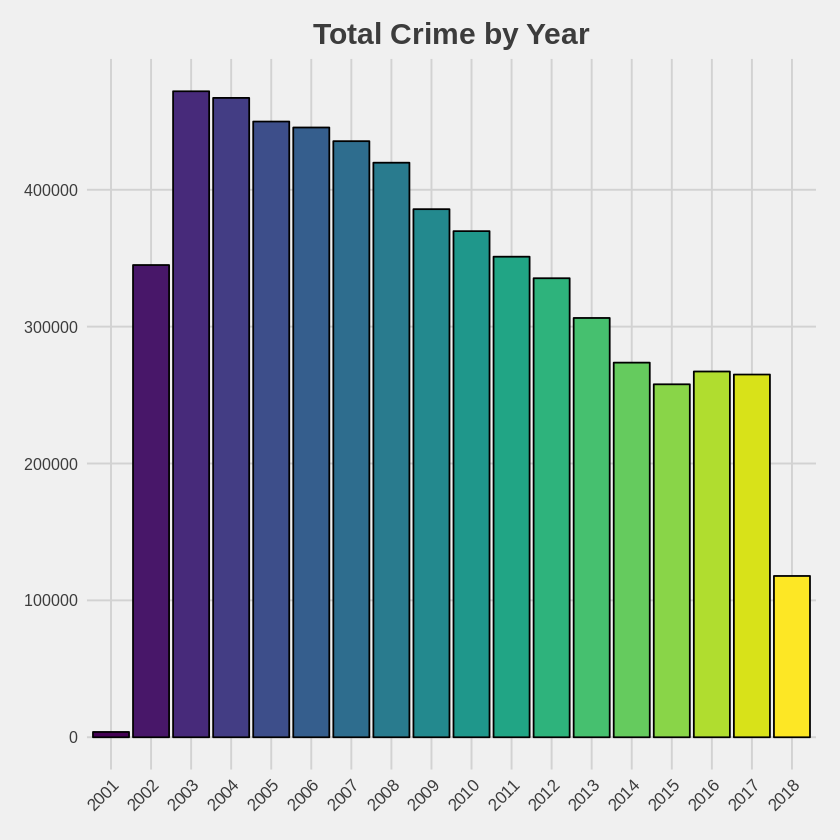

In [4]:
options(scipen=999)
ggplot(year_count, aes(factor(Year), Count, fill=Year)) +
geom_bar(stat = 'identity', color = 'black') +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("Total Crime by Year") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

2001 is almost non-existent. Not much data gathered for that year. 2018 is light as well for obvious reasons.

# Total crime by Type

In [5]:
crime_count <- Chi_crimes %>%
group_by(Primary.Type) %>%
summarise(Count = n()) %>%
arrange(desc(Count))

crime_count

Primary.Type                      Count  
1  THEFT                             1254049
2  BATTERY                           1088921
3  CRIMINAL DAMAGE                    685362
4  NARCOTICS                          630103
5  OTHER OFFENSE                      369682
6  ASSAULT                            368849
7  BURGLARY                           349140
8  MOTOR VEHICLE THEFT                274729
9  DECEPTIVE PRACTICE                 228576
10 ROBBERY                            227310
11 CRIMINAL TRESPASS                  172430
12 WEAPONS VIOLATION                   62399
13 PROSTITUTION                        59540
14 PUBLIC PEACE VIOLATION              43635
15 OFFENSE INVOLVING CHILDREN          39765
16 CRIM SEXUAL ASSAULT                 23026
17 SEX OFFENSE                         20941
18 INTERFERENCE WITH PUBLIC OFFICER    14035
19 GAMBLING                            13086
20 LIQUOR LAW VIOLATION                11834
21 ARSON                                9606
22 HOMICIDE                             8774
23 KIDNAPPING                           5406
24 INTIMIDATION                         3459
25 STALKING                             2994
26 OBSCENITY                             498
27 CONCEALED CARRY LICENSE VIOLATION     207
28 PUBLIC INDECENCY                      145
29 NON-CRIMINAL                          141
30 OTHER NARCOTIC VIOLATION              113
31 HUMAN TRAFFICKING                      41
32 NON - CRIMINAL                         38
33 RITUALISM                              14
34 NON-CRIMINAL (SUBJECT SPECIFIED)        7

Here's a breakdown of all crime in the city for the entire dataset. Theft leads the way.

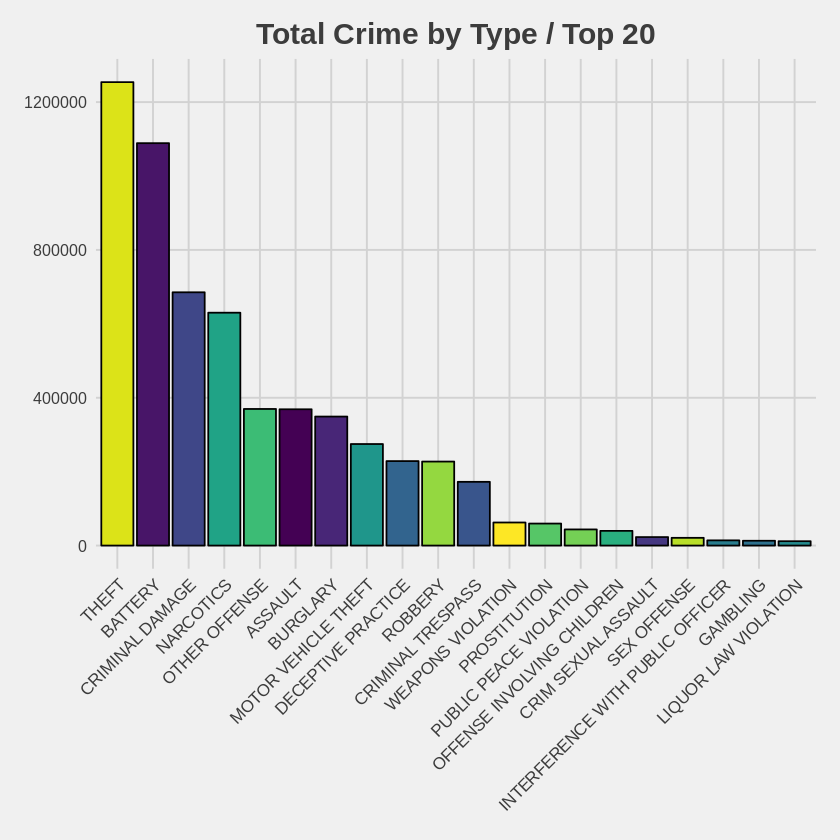

In [6]:
ggplot(head(crime_count, 20), aes(reorder(Primary.Type, -Count), Count, fill=Primary.Type)) +
geom_bar(stat = 'identity', color = 'black') +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("Total Crime by Type / Top 20") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

A quick plot of the top 20 crimes by Type.

# Total crime by location

In [7]:
crime_location <- Chi_crimes %>%
group_by(Location.Description) %>%
summarise(Count = n()) %>%
arrange(desc(Count))

crime_location

Location.Description                         Count  
1   STREET                                       1545469
2   RESIDENCE                                     990927
3   APARTMENT                                     641519
4   SIDEWALK                                      614547
5   OTHER                                         221688
6   PARKING LOT/GARAGE(NON.RESID.)                169406
7   ALLEY                                         134490
8   SCHOOL, PUBLIC, BUILDING                      126400
9   RESIDENCE-GARAGE                              116483
10  SMALL RETAIL STORE                            106038
11  RESIDENCE PORCH/HALLWAY                       104307
12  VEHICLE NON-COMMERCIAL                         99440
13  RESTAURANT                                     93242
14  GROCERY FOOD STORE                             74721
15  DEPARTMENT STORE                               73300
16  RESIDENTIAL YARD (FRONT/BACK)                  66719
17  GAS STATION                                    64440
18  PARK PROPERTY                                  46470
19  CHA PARKING LOT/GROUNDS                        44027
20  COMMERCIAL / BUSINESS OFFICE                   41110
21  BAR OR TAVERN                                  32533
22  CTA PLATFORM                                   31585
23  CHA APARTMENT                                  28052
24  DRUG STORE                                     26553
25  SCHOOL, PUBLIC, GROUNDS                        26140
26  HOTEL/MOTEL                                    24351
27  BANK                                           23974
28  VACANT LOT/LAND                                21816
29  CTA TRAIN                                      21715
30  CHA HALLWAY/STAIRWELL/ELEVATOR                 20112
⋮   ⋮                                            ⋮      
150 WOODED AREA                                  3      
151 YMCA                                         3      
152 CHA BREEZEWAY                                2      
153 CHA ELEVATOR                                 2      
154 CTA "L" TRAIN                                2      
155 FACTORY                                      2      
156 FARM                                         2      
157 GOVERNMENT BUILDING                          2      
158 LAKE                                         2      
159 LAUNDRY ROOM                                 2      
160 LIVERY STAND OFFICE                          2      
161 PRAIRIE                                      2      
162 PUBLIC HIGH SCHOOL                           2      
163 ROOMING HOUSE                                2      
164 VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS 2      
165 BANQUET HALL                                 1      
166 CHURCH PROPERTY                              1      
167 CLEANERS/LAUNDROMAT                          1      
168 COUNTY JAIL                                  1      
169 ELEVATOR                                     1      
170 EXPRESSWAY EMBANKMENT                        1      
171 FUNERAL PARLOR                               1      
172 HORSE STABLE                                 1      
173 JUNK YARD/GARBAGE DUMP                       1      
174 LAGOON                                       1      
175 LIVERY AUTO                                  1      
176 LOADING DOCK                                 1      
177 POOLROOM                                     1      
178 PUBLIC GRAMMAR SCHOOL                        1      
179 TRUCKING TERMINAL                            1

Crime in the street leads the way.

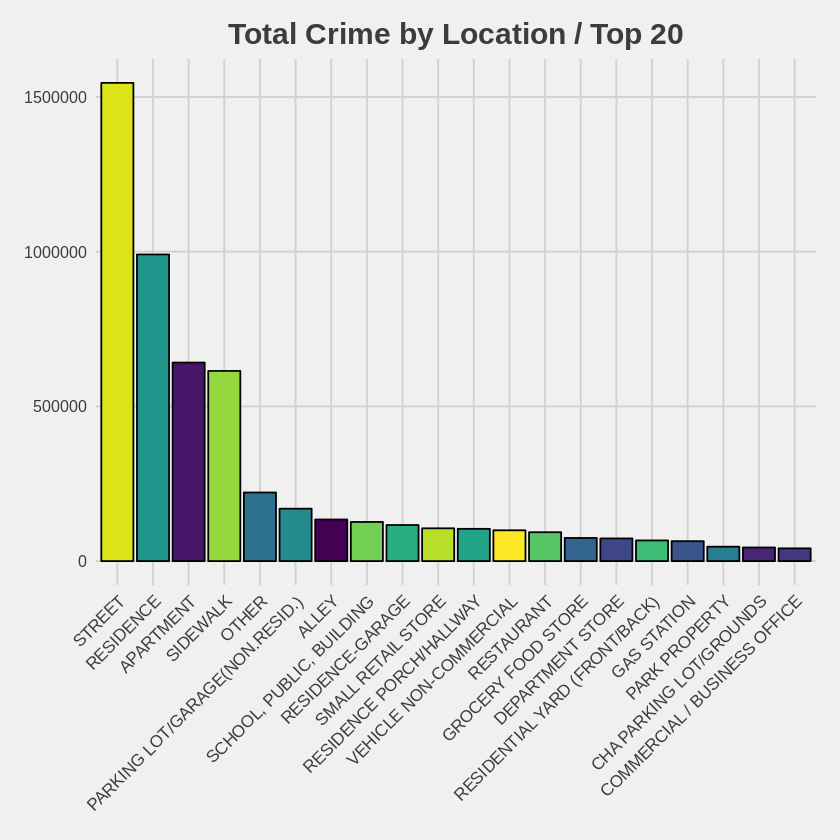

In [8]:
ggplot(head(crime_location, 20), aes(reorder(Location.Description, -Count), Count, fill=Location.Description)) +
geom_bar(stat = 'identity', color = 'black') +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("Total Crime by Location / Top 20") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

A quick plot of the top 20 locations where crime is reported in this dataset.

# Trends in Time

### Cleaned up the time variables a bit

In [9]:
Chi_crime_time <- readRDS("/home/ferrous/Crime_Case_Study_Data/Chi_crime_time.rds")

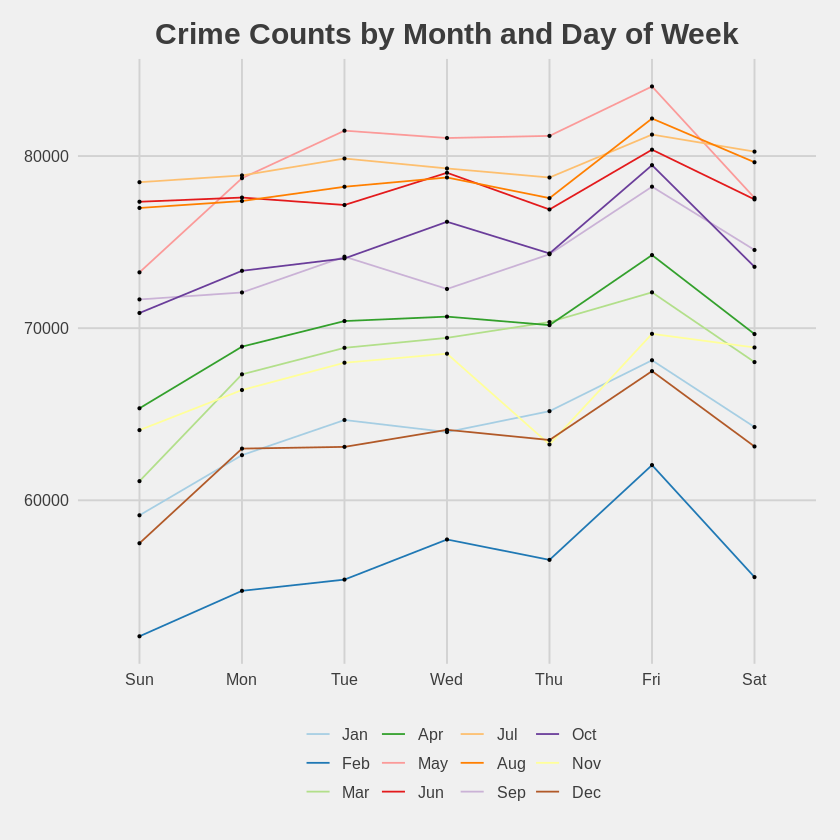

In [10]:
Chi_crime_time %>% 
group_by(Weekday,Month) %>% 
summarize(count=n()) %>% 
ggplot(aes(x=Weekday,y=count,color=Month,group=Month)) + 
geom_line() + 
scale_color_brewer(name="",palette='Paired') + 
geom_point(color='black',size=.5,alpha=1) + 
ggtitle('Crime Counts by Month and Day of Week') +
theme_fivethirtyeight() +
theme(plot.title = element_text(hjust = 0.5))

In [11]:
month_count <- Chi_crime_time %>%
group_by(Month) %>%
summarise(Count = n())

month_count

Month Count 
1  Jan   447938
2  Feb   394065
3  Mar   477188
4  Apr   489430
5  May   557261
6  Jun   545861
7  Jul   556746
8  Aug   550712
9  Sep   517227
10 Oct   521819
11 Nov   468780
12 Dec   441828

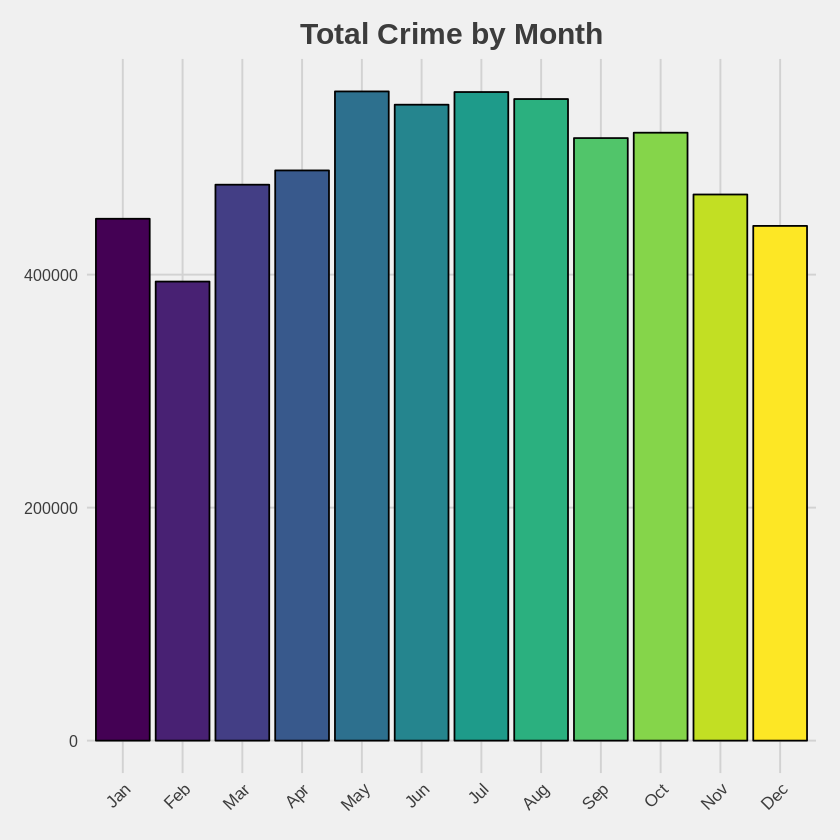

In [12]:
options(scipen=999)
ggplot(month_count, aes(factor(Month), Count, fill=Month)) +
geom_bar(stat = 'identity', color = 'black') +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("Total Crime by Month") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

Looks like crime occurs most often during the warmer months of the year.

# Investigating Crime by Arrest over Time

### Back to the full dataset, 2001 to 2018 and looking at arrests only

In [92]:
library(mapproj)
library(ggmap)
library(maps)
library(maptools)
library(RgoogleMaps)
library(sp)
library(repr)
library(scales)

In [49]:
Chi_arrests <- readRDS('/home/ferrous/Crime_Case_Study_Data/Chi_arrests.rds')

In [50]:
daily_arrests <- Chi_arrests %>%
mutate(Date = as.Date(Date, "%m/%d/%Y")) %>%
group_by(Date) %>% 
summarize(count = n()) %>%
arrange(Date)

head(daily_arrests, 10)

Date       count
1  2001-01-01 24   
2  2001-01-03  1   
3  2001-01-06  2   
4  2001-01-07  1   
5  2001-01-09  1   
6  2001-01-10  2   
7  2001-01-11  2   
8  2001-01-12  2   
9  2001-01-13  1   
10 2001-01-14  1

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


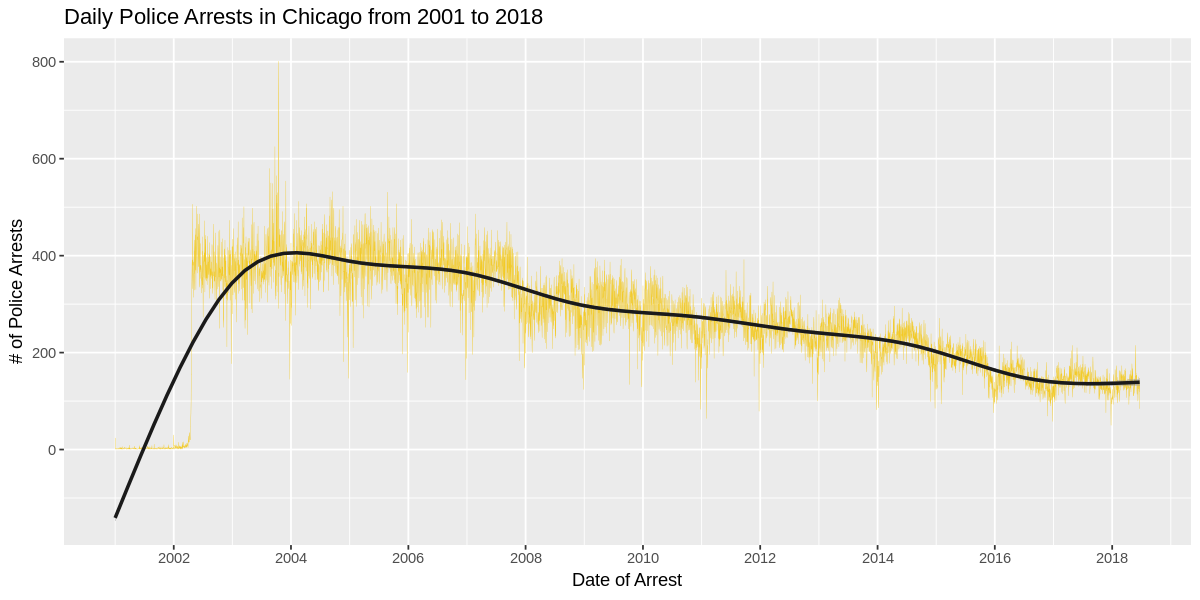

In [51]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(daily_arrests, aes(x = Date, y = count)) +
geom_line(color = "#F2CA27", size = 0.1) +
geom_smooth(color = "#1A1A1A") +
scale_x_date(breaks = date_breaks("2 years"), labels = date_format("%Y")) +
labs(x = "Date of Arrest", y = "# of Police Arrests", title = "Daily Police Arrests in Chicago from 2001 to 2018")

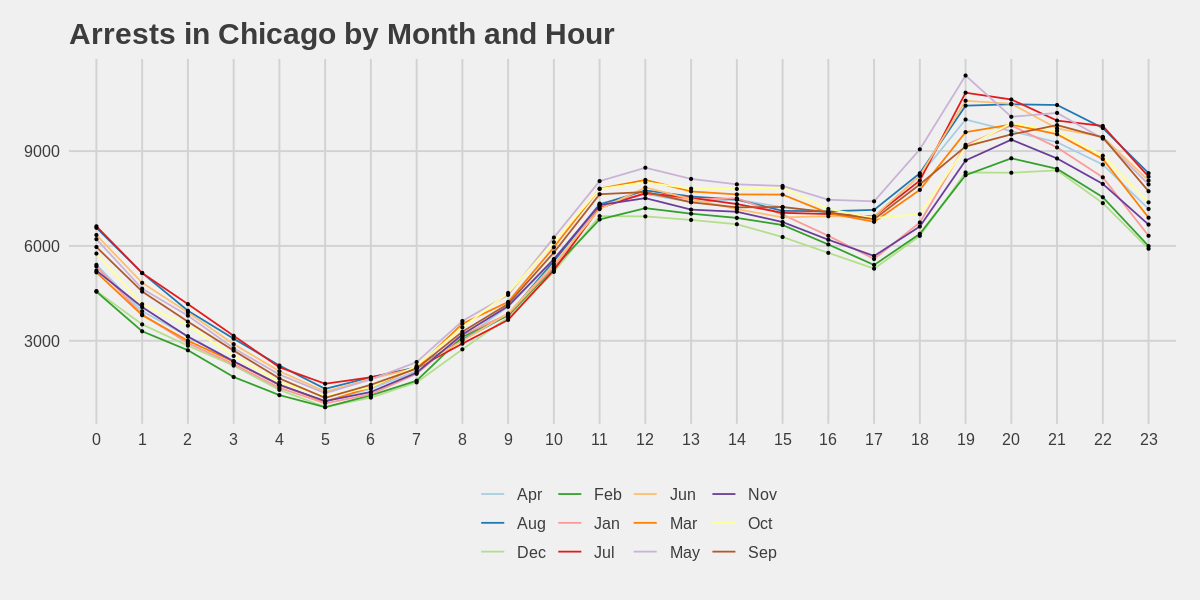

In [52]:
arrests_hour <- Chi_arrests %>% 
group_by(hour,month) %>% 
summarize(count=n()) %>% 
ggplot(aes(x=factor(hour),y=count,color=month,group=month)) + 
geom_line() + 
scale_color_manual(name="",values=brewer.pal(12,'Paired')) + 
geom_point(color='black',size=.5,alpha=1) + 
theme_fivethirtyeight() +
ggtitle('Arrests in Chicago by Month and Hour')

plot(arrests_hour)

# Arrests by Day of Week and Time of Day

In [53]:
arrest_time <- Chi_arrests %>%
group_by(Weekday, hour) %>%
summarize(count = n())

head(arrest_time, 10)

Weekday hour count
1  Fri     0    9176 
2  Fri     1    6667 
3  Fri     2    5312 
4  Fri     3    3781 
5  Fri     4    2595 
6  Fri     5    1863 
7  Fri     6    2741 
8  Fri     7    3829 
9  Fri     8    5945 
10 Fri     9    7659

In [54]:
hour_format <- c(paste(c(12,1:11),"AM"), paste(c(12,1:11),"PM"))

arrest_time$hour <- factor(arrest_time$hour, level = 0:23, label = hour_format)

head(arrest_time, 10)

Weekday hour  count
1  Fri     12 AM 9176 
2  Fri     1 AM  6667 
3  Fri     2 AM  5312 
4  Fri     3 AM  3781 
5  Fri     4 AM  2595 
6  Fri     5 AM  1863 
7  Fri     6 AM  2741 
8  Fri     7 AM  3829 
9  Fri     8 AM  5945 
10 Fri     9 AM  7659

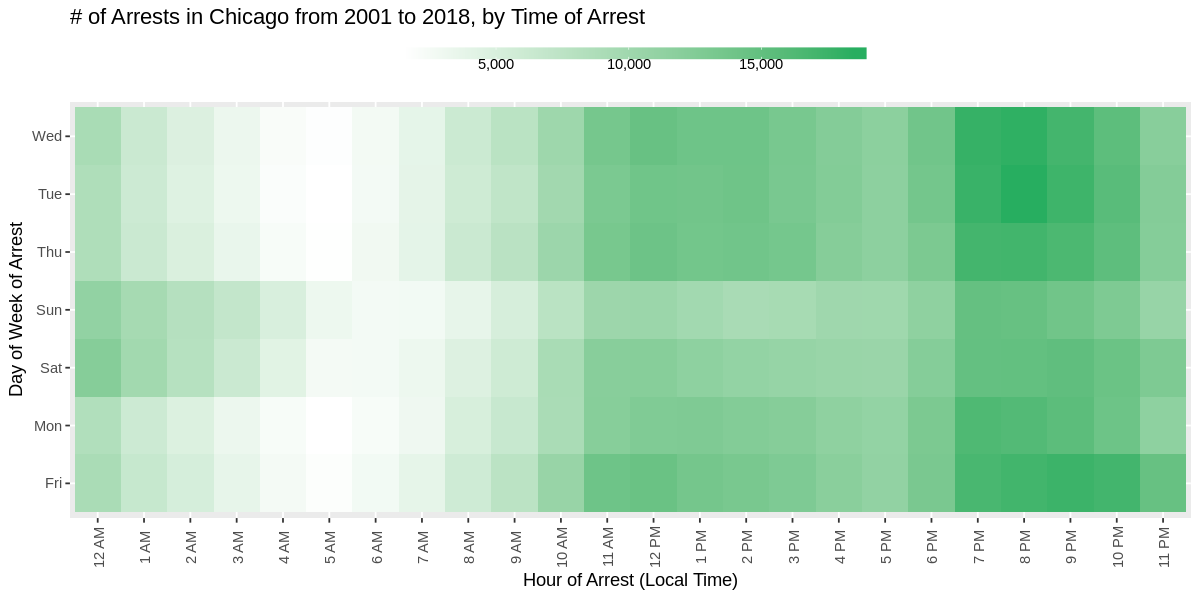

In [55]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(arrest_time, aes(x = factor(hour), y = Weekday, fill = count)) +
geom_tile() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.6), legend.title = element_blank(), legend.position="top", legend.direction="horizontal", legend.key.width=unit(2, "cm"), legend.key.height=unit(0.25, "cm"), legend.spacing=unit(-0.5,"cm"), panel.spacing=element_blank()) +
labs(x = "Hour of Arrest (Local Time)", y = "Day of Week of Arrest", title = "# of Arrests in Chicago from 2001 to 2018, by Time of Arrest") + scale_fill_gradient(low = "white", high = "#27AE60", labels = comma)


# Arrests by Primary Type

In [56]:
crimes_primary <- Chi_arrests %>%
group_by(Primary.Type) %>%
summarize(count = n()) %>%
arrange(desc(count))

head(crimes_primary, 20)

Primary.Type                     count 
1  NARCOTICS                        626311
2  BATTERY                          249520
3  THEFT                            146622
4  CRIMINAL TRESPASS                126182
5  ASSAULT                           85983
6  OTHER OFFENSE                     65637
7  PROSTITUTION                      59282
8  WEAPONS VIOLATION                 49854
9  CRIMINAL DAMAGE                   47760
10 DECEPTIVE PRACTICE                37438
11 PUBLIC PEACE VIOLATION            29110
12 MOTOR VEHICLE THEFT               23987
13 ROBBERY                           22027
14 BURGLARY                          19751
15 GAMBLING                          12996
16 INTERFERENCE WITH PUBLIC OFFICER  12939
17 LIQUOR LAW VIOLATION              11718
18 OFFENSE INVOLVING CHILDREN         8174
19 SEX OFFENSE                        6444
20 HOMICIDE                           4081

In [57]:
primary_time <- Chi_arrests %>%
filter(Primary.Type %in% crimes_primary$Primary.Type[1:20]) %>%
group_by(Primary.Type, Weekday, hour) %>%
summarize(count = n())

primary_time$hour <- factor(primary_time$hour, level = 0:23, label = hour_format)
primary_time$Weekday <- factor(primary_time$Weekday, levels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
head(primary_time, 10)

Primary.Type Weekday hour  count
1  ASSAULT      Fri     12 AM 458  
2  ASSAULT      Fri     1 AM  406  
3  ASSAULT      Fri     2 AM  327  
4  ASSAULT      Fri     3 AM  214  
5  ASSAULT      Fri     4 AM  153  
6  ASSAULT      Fri     5 AM  105  
7  ASSAULT      Fri     6 AM  140  
8  ASSAULT      Fri     7 AM  181  
9  ASSAULT      Fri     8 AM  393  
10 ASSAULT      Fri     9 AM  490

In [58]:
primary_time <- primary_time %>%
group_by(Primary.Type) %>%
mutate(norm = count/sum(count))

head(primary_time, 10)

Primary.Type Weekday hour  count norm       
1  ASSAULT      Fri     12 AM 458   0.005326634
2  ASSAULT      Fri     1 AM  406   0.004721864
3  ASSAULT      Fri     2 AM  327   0.003803077
4  ASSAULT      Fri     3 AM  214   0.002488864
5  ASSAULT      Fri     4 AM  153   0.001779422
6  ASSAULT      Fri     5 AM  105   0.001221172
7  ASSAULT      Fri     6 AM  140   0.001628229
8  ASSAULT      Fri     7 AM  181   0.002105067
9  ASSAULT      Fri     8 AM  393   0.004570671
10 ASSAULT      Fri     9 AM  490   0.005698801

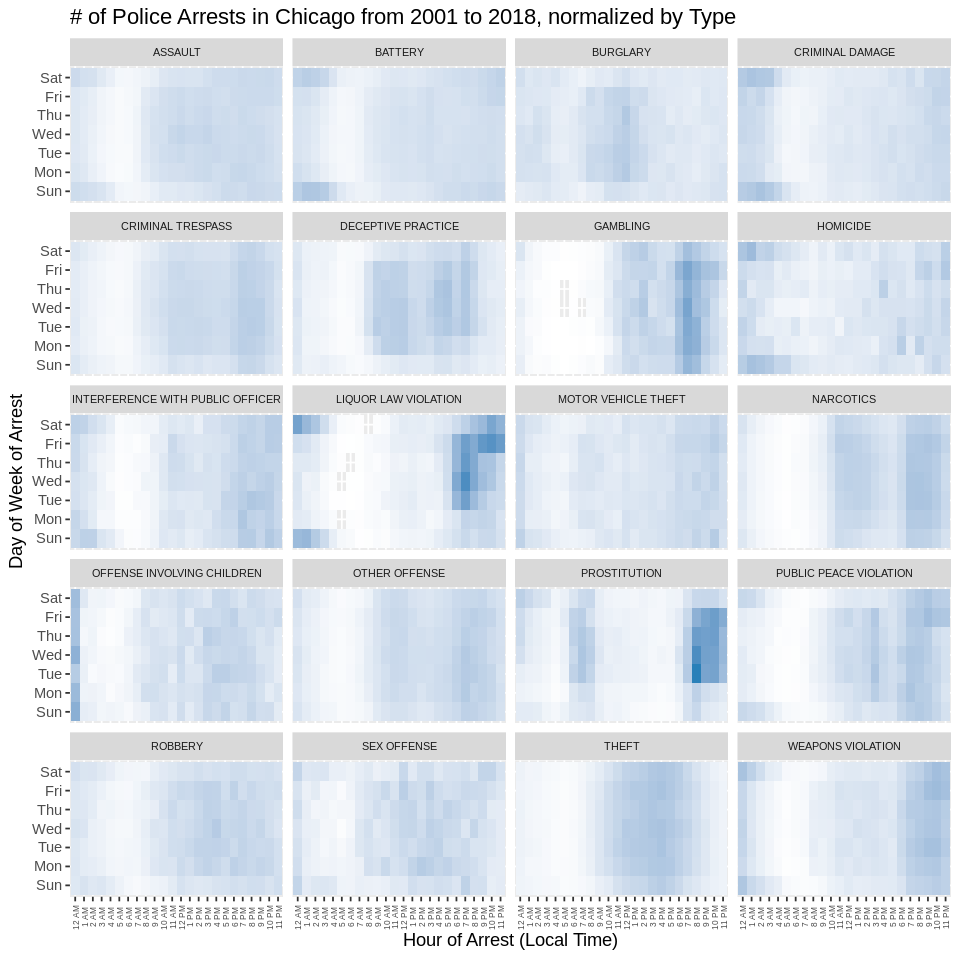

In [59]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(primary_time, aes(x = hour, y = Weekday, fill = norm)) +
geom_tile() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.6, size = 5), strip.text = element_text(size = 6.5)) +
theme(legend.position = "none") +
labs(x= "Hour of Arrest (Local Time)", y = "Day of Week of Arrest", title = "# of Police Arrests in Chicago from 2001 to 2018, normalized by Type") +
scale_fill_gradient(low = "white", high = "#2980B9") +
facet_wrap(~ Primary.Type, ncol = 4)

# Arrests by District 

In [60]:
district <- Chi_arrests %>%
group_by(District, Weekday, hour) %>%
summarize(count = n())

district$hour <- factor(district$hour, level = 0:23, label = hour_format)
district$Weekday <- factor(district$Weekday, levels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))
district$District <- factor(district$District, levels=c(1:12, 14:22, 24:31))

head(district)

District Weekday hour  count
1 1        Fri     12 AM 220  
2 1        Fri     1 AM  154  
3 1        Fri     2 AM  133  
4 1        Fri     3 AM   69  
5 1        Fri     4 AM   76  
6 1        Fri     5 AM   85

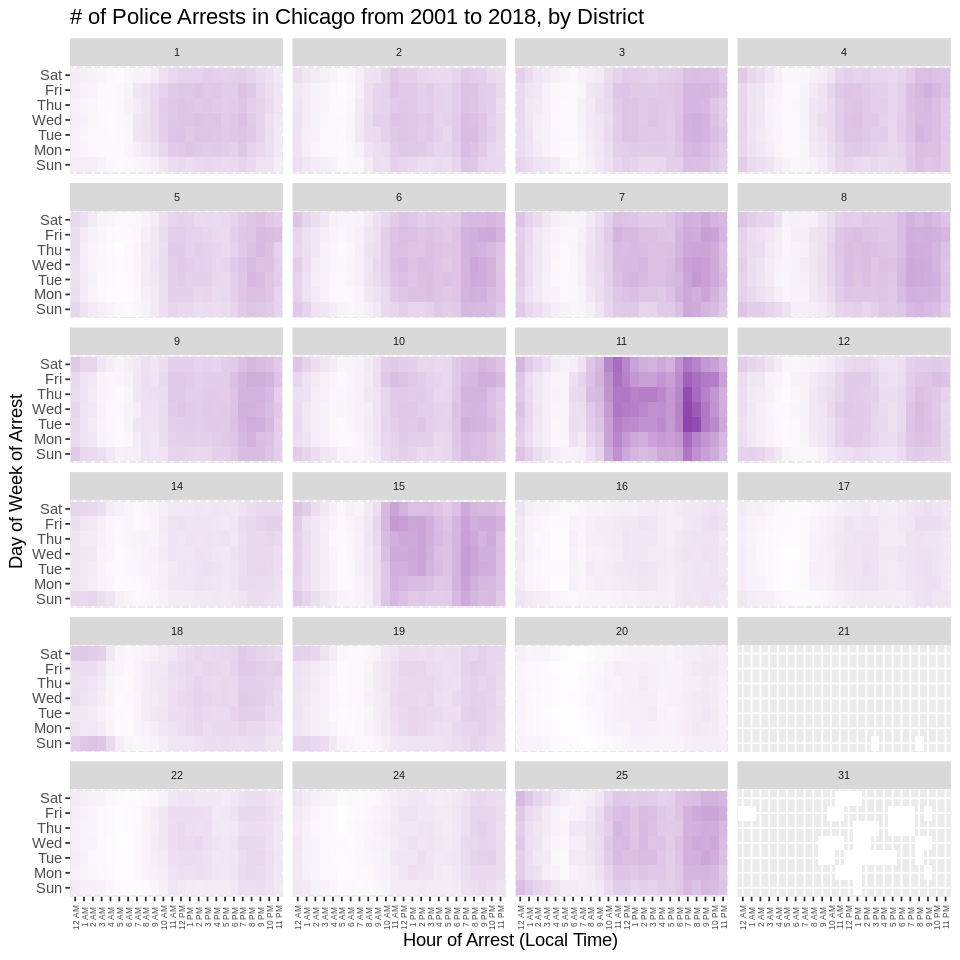

In [61]:
options(repr.plot.width=8, repr.plot.height=8)

ggplot(district, aes(x = hour, y = Weekday, fill = count)) +
geom_tile() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.6, size = 5), strip.text = element_text(size = 6.5)) +
theme(legend.position = "none") +
labs(x= "Hour of Arrest (Local Time)", y = "Day of Week of Arrest", title = "# of Police Arrests in Chicago from 2001 to 2018, by District") +
scale_fill_gradient(low = "white", high = "#8E44AD") +
facet_wrap(~District, ncol = 4)

### Looks like District 11 has the highest concentration of arrests for most of the day

In [62]:
district <- readRDS('/home/ferrous/Crime_Case_Study_Data/district.rds')

In [63]:
district_count <- district %>%
group_by(District) %>%
summarise(Count = n()) %>%
arrange(desc(Count))

district_count

District Count 
1  11       166866
2  15       110257
3   7       104358
4  25        99782
5   8        98979
6   6        94755
7   9        86956
8  10        84130
9   3        84051
10  4        80960
11  2        74352
12  5        70463
13 12        70461
14  1        68393
15 18        63738
16 19        58594
17 14        49317
18 22        43102
19 24        42196
20 17        38203
21 16        38080
22 20        24918
23 31           54
24 21            2

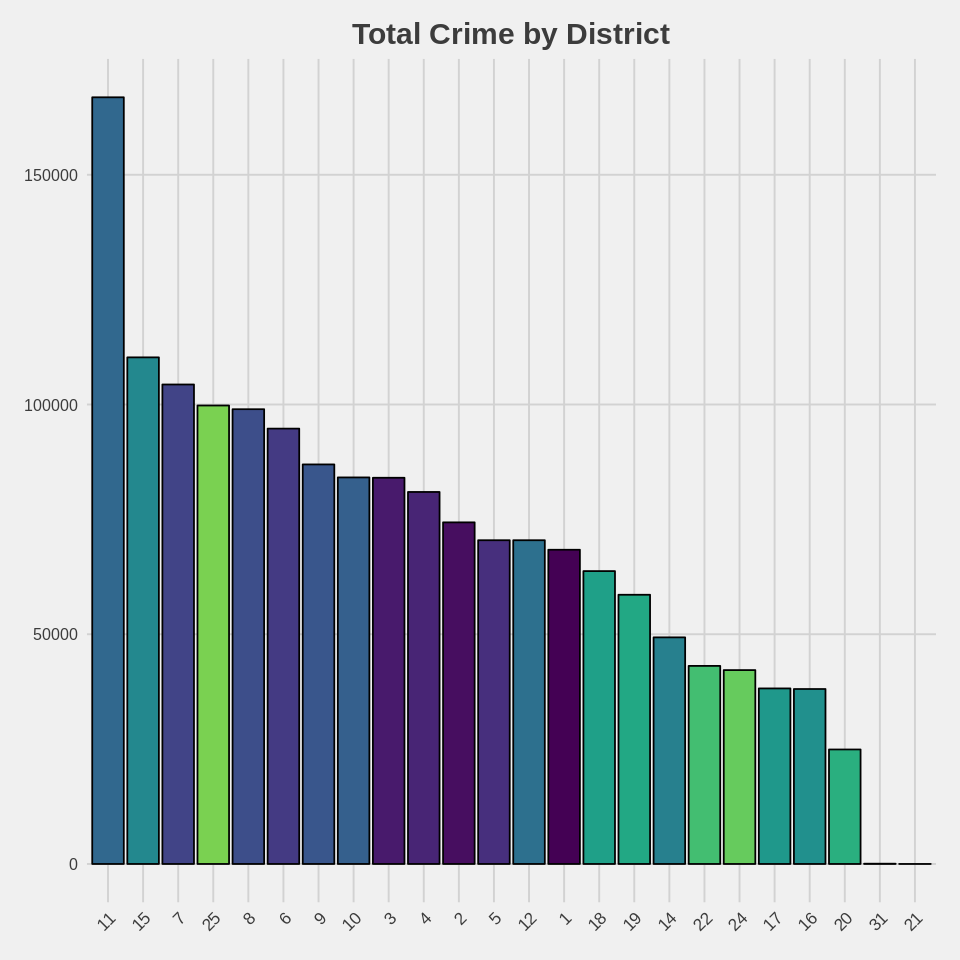

In [64]:
options(scipen=999)
ggplot(district_count, aes(reorder(District, -Count), Count, fill=District)) +
geom_bar(stat = 'identity', color = 'black') +
scale_fill_viridis(discrete=FALSE) +
theme_fivethirtyeight() +
ggtitle("Total Crime by District") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

In [65]:
top_district <- district %>%
filter(District == 11) %>%
group_by(Primary.Type) %>%
summarize(count = n()) %>%
arrange(Primary.Type) %>%
arrange(desc(count))

head(top_district, 20)

Primary.Type                     count 
1  NARCOTICS                        105498
2  BATTERY                           13925
3  PROSTITUTION                       9307
4  CRIMINAL TRESPASS                  5048
5  ASSAULT                            4667
6  OTHER OFFENSE                      4212
7  THEFT                              4205
8  WEAPONS VIOLATION                  3962
9  DECEPTIVE PRACTICE                 3661
10 CRIMINAL DAMAGE                    2224
11 GAMBLING                           1887
12 MOTOR VEHICLE THEFT                1647
13 INTERFERENCE WITH PUBLIC OFFICER   1452
14 PUBLIC PEACE VIOLATION             1393
15 ROBBERY                            1189
16 BURGLARY                            775
17 OFFENSE INVOLVING CHILDREN          477
18 LIQUOR LAW VIOLATION                377
19 HOMICIDE                            376
20 SEX OFFENSE                         209

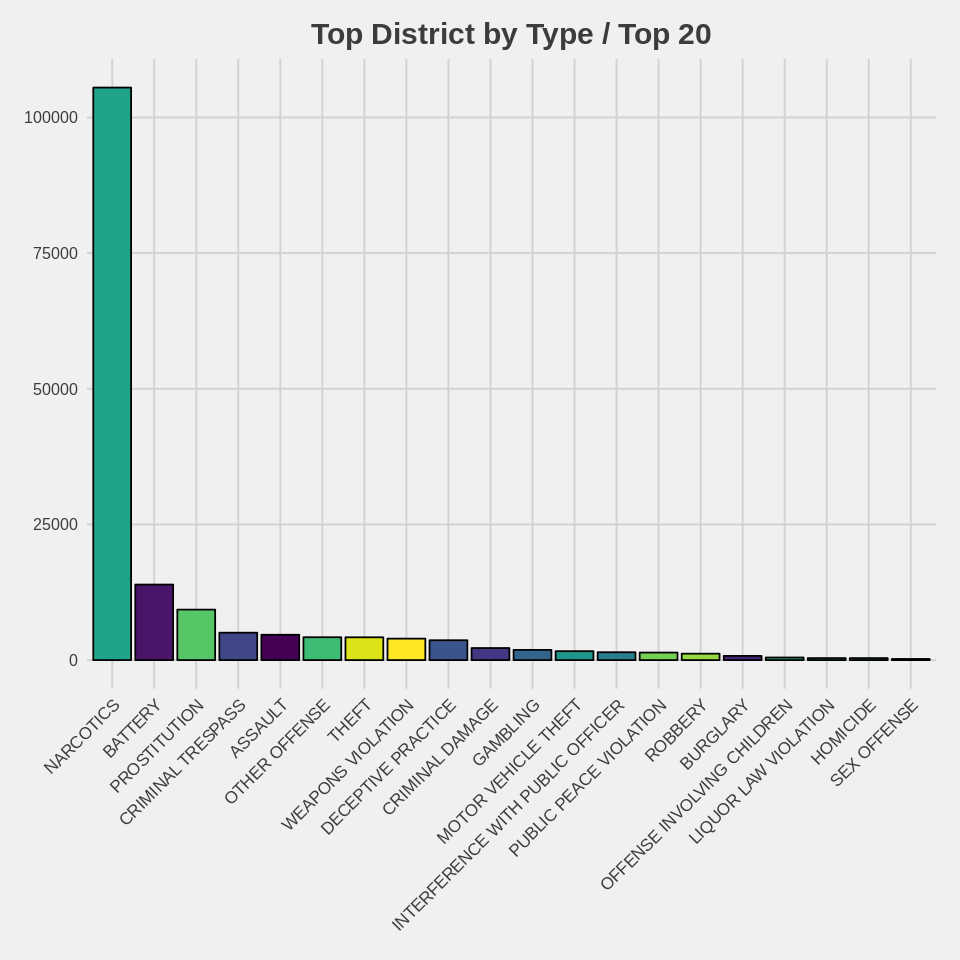

In [66]:
ggplot(head(top_district, 20), aes(reorder(Primary.Type, -count), count, fill=Primary.Type)) +
geom_bar(stat = 'identity', color = 'black') +
scale_fill_viridis(discrete=TRUE) +
theme_fivethirtyeight() +
ggtitle("Top District by Type / Top 20") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

In [67]:
top_district_year <- district %>%
filter(District == 11) %>%
group_by(year) %>%
summarize(count =n()) %>%
arrange()

top_district_year

year count
1  2001   138
2  2002  9149
3  2003 14090
4  2004 13702
5  2005 13959
6  2006 12750
7  2007 11636
8  2008  9930
9  2009  9438
10 2010  9326
11 2011  8609
12 2012  9064
13 2013 10574
14 2014 10157
15 2015  8269
16 2016  6542
17 2017  6394
18 2018  3139

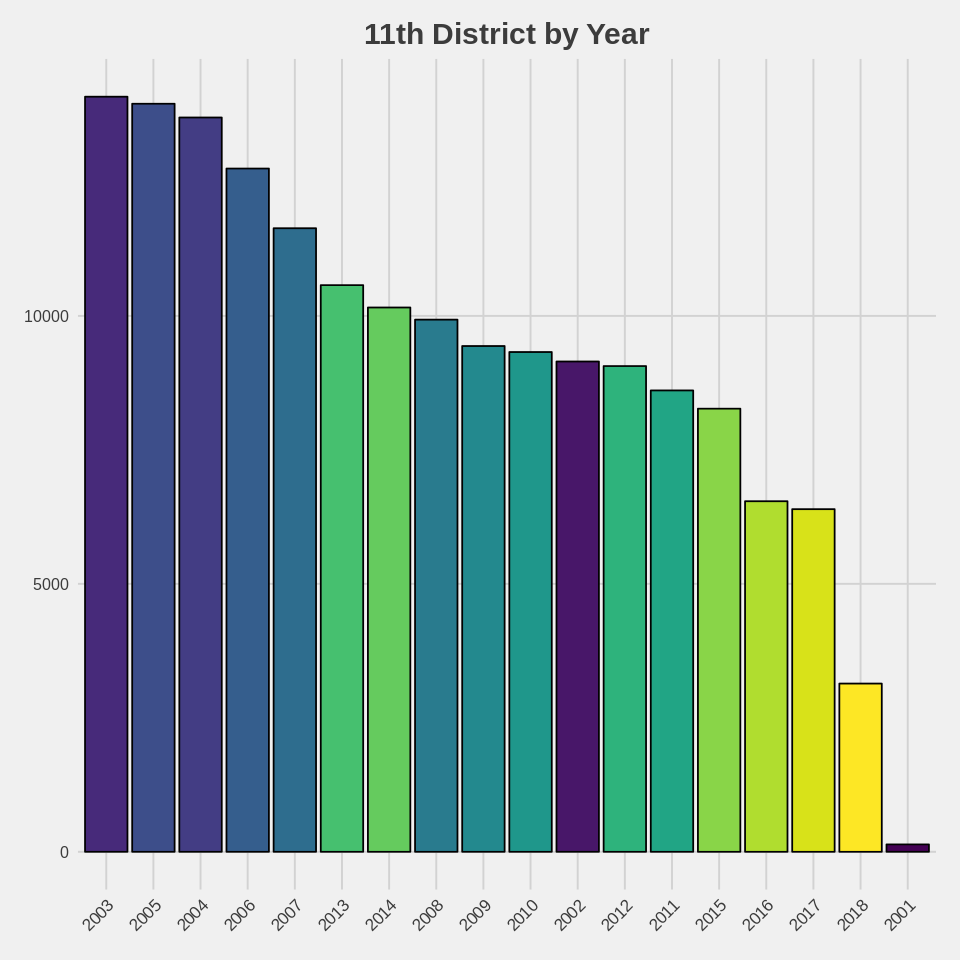

In [68]:
options(scipen=999)
ggplot(top_district_year, aes(reorder(year, -count), count, fill=year)) +
geom_bar(stat = 'identity', color = 'black') +
scale_fill_viridis(discrete=FALSE) +
theme_fivethirtyeight() +
ggtitle("11th District by Year") +
theme(legend.position="none") +
theme(axis.title.x=element_blank()) +
theme(plot.title = element_text(hjust = 0.5)) +
theme(axis.text.x = element_text(angle = 45, size=10,hjust = 1))

# The 11th District's top 3 types of crime mapped

In [69]:
total_nar <- filter(district, district$Primary.Type == "NARCOTICS")

eleven_nar <- filter(total_nar, total_nar$District == 11)

In [70]:
total_bat <- filter(district, district$Primary.Type == "BATTERY")

eleven_bat <- filter(total_bat, total_bat$District == 11)

In [71]:
total_pros <- filter(district, district$Primary.Type == "PROSTITUTION")

eleven_pros <- filter(total_pros, total_pros$District == 11)

In [72]:
dist_map <- qmap('60624', zoom = 13, color = "bw")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=60624&zoom=13&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=60624&sensor=false
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

Warning message:
“Removed 1 rows containing missing values (geom_point).”Theme element panel.border missing
Theme element axis.line.x.bottom missing
Theme element axis.ticks.x.bottom missing
Theme element axis.line.x.top missing
Theme element axis.ticks.x.top missing
Theme element axis.line.y.left missing
Theme element axis.ticks.y.left missing
Theme element axis.line.y.right missing
Theme element axis.ticks.y.right missing
Theme element plot.title missing
Theme element plot.subtitle missing
Theme element plot.tag missing
Theme element plot.caption missing


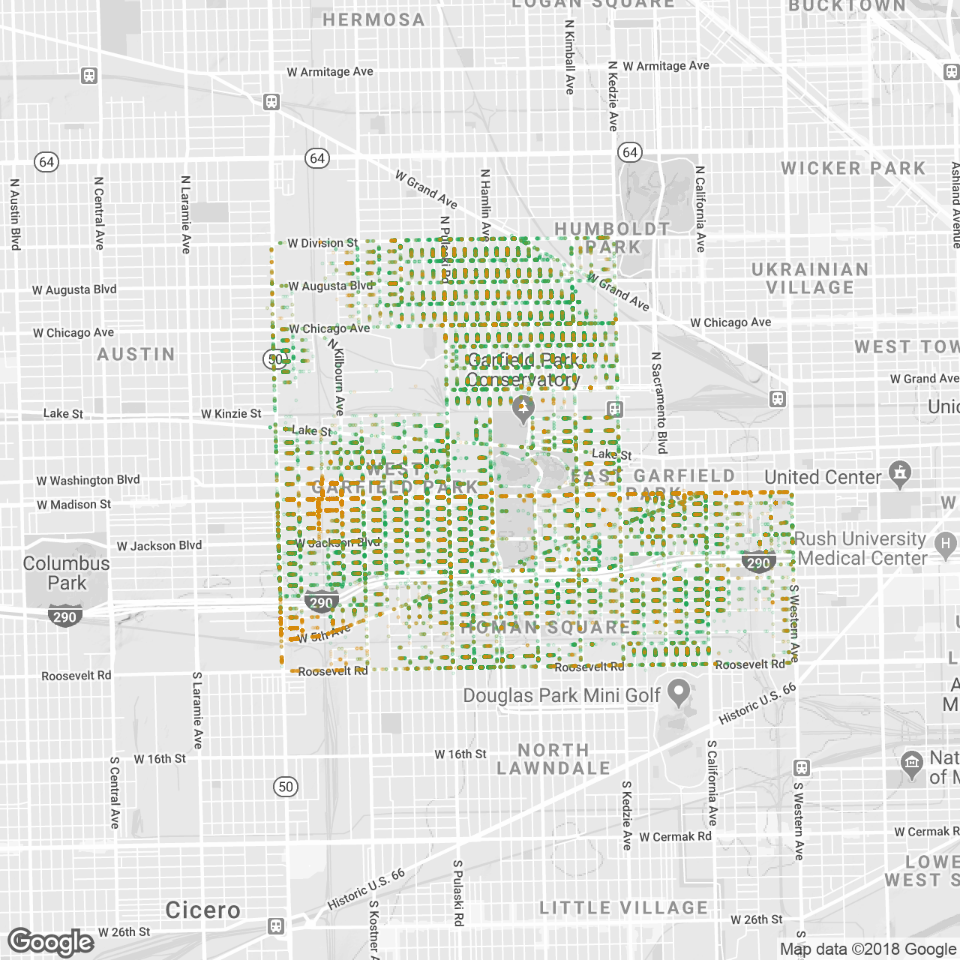

In [73]:
dist_map +
geom_point(aes(x = Longitude, y = Latitude, colour = Primary.Type), data = eleven_nar, color = "#27AE60", size = 0.5, alpha = 0.1) +
geom_point(aes(x = Longitude, y = Latitude, colour = Primary.Type), data = eleven_bat, color = "#dd8d13", size = 0.5, alpha = 0.1) +
geom_point(aes(x = Longitude, y = Latitude, colour = Primary.Type), data = eleven_pros, color = "#dd8d13", size = 0.5, alpha = 0.1)

Warning message:
“Removed 1 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 1 rows containing non-finite values (stat_density2d).”Theme element panel.border missing
Theme element axis.line.x.bottom missing
Theme element axis.ticks.x.bottom missing
Theme element axis.line.x.top missing
Theme element axis.ticks.x.top missing
Theme element axis.line.y.left missing
Theme element axis.ticks.y.left missing
Theme element axis.line.y.right missing
Theme element axis.ticks.y.right missing
Theme element plot.tag missing
Theme element plot.caption missing


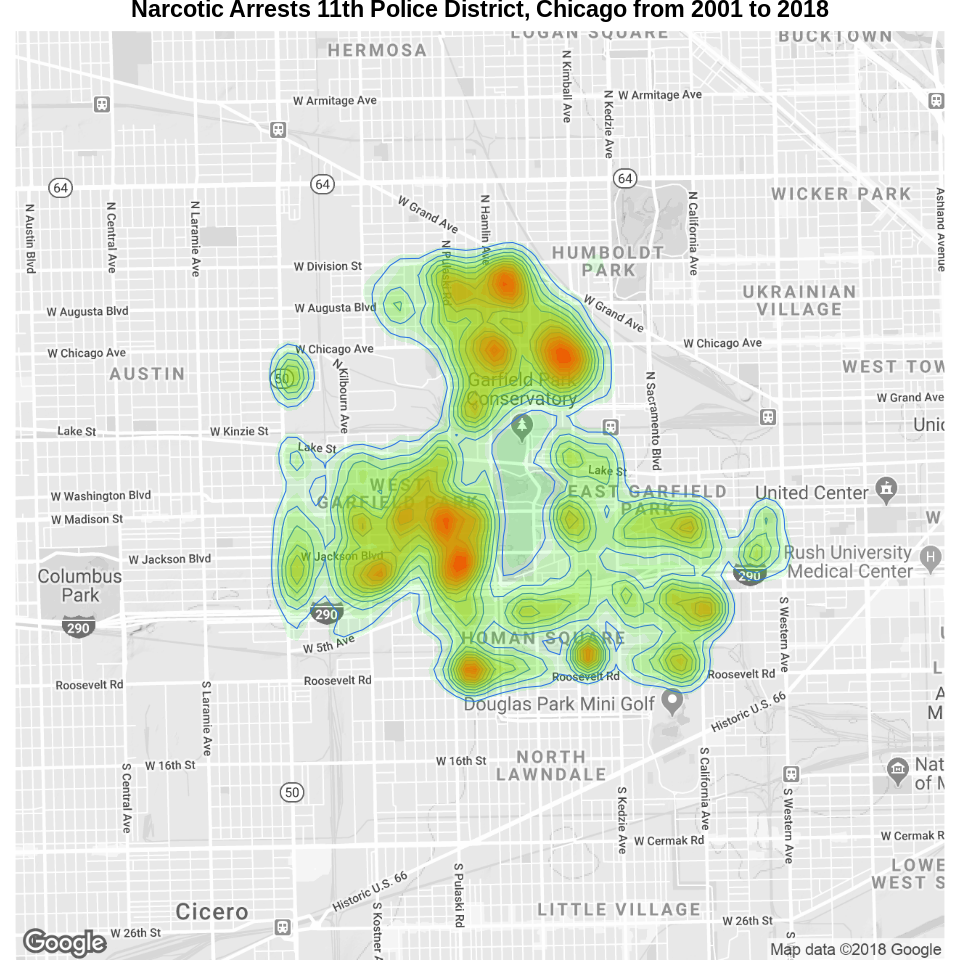

In [74]:
dist_map +
geom_density2d(data = eleven_nar, aes(x = Longitude, y = Latitude), size = 0.3) +
stat_density2d(data = eleven_nar, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") +
scale_fill_gradient(low = "green", high = "red") + 
scale_alpha(range = c(0.1, 0.4), guide = FALSE) +
theme(legend.position="none") +
ggtitle("Narcotic Arrests 11th Police District, Chicago from 2001 to 2018") +
theme(plot.title=element_text(size=14, face="bold")) +
theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Theme element panel.border missing
Theme element axis.line.x.bottom missing
Theme element axis.ticks.x.bottom missing
Theme element axis.line.x.top missing
Theme element axis.ticks.x.top missing
Theme element axis.line.y.left missing
Theme element axis.ticks.y.left missing
Theme element axis.line.y.right missing
Theme element axis.ticks.y.right missing
Theme element plot.tag missing
Theme element plot.caption missing


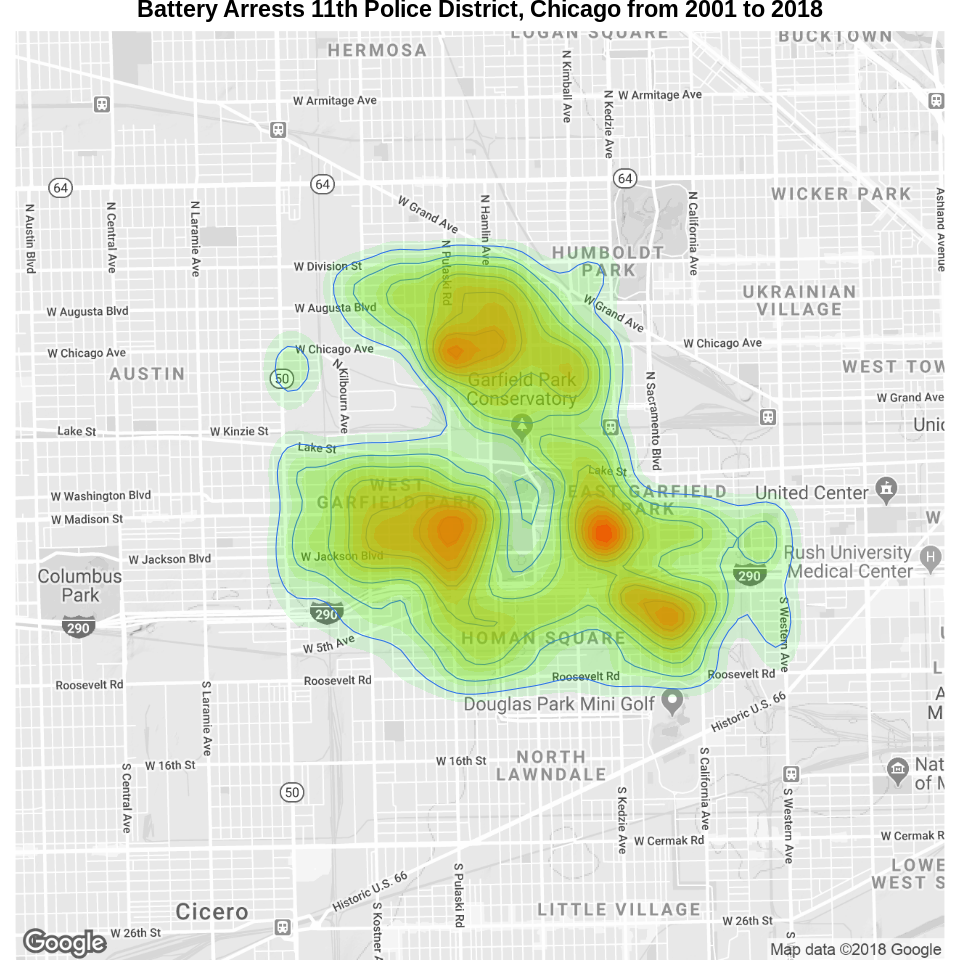

In [75]:
dist_map +
geom_density2d(data = eleven_bat, aes(x = Longitude, y = Latitude), size = 0.3) +
stat_density2d(data = eleven_bat, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") +
scale_fill_gradient(low = "green", high = "red") + 
scale_alpha(range = c(0.1, 0.4), guide = FALSE) +
theme(legend.position="none") +
ggtitle("Battery Arrests 11th Police District, Chicago from 2001 to 2018") +
theme(plot.title=element_text(size=14, face="bold")) +
theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

Theme element panel.border missing
Theme element axis.line.x.bottom missing
Theme element axis.ticks.x.bottom missing
Theme element axis.line.x.top missing
Theme element axis.ticks.x.top missing
Theme element axis.line.y.left missing
Theme element axis.ticks.y.left missing
Theme element axis.line.y.right missing
Theme element axis.ticks.y.right missing
Theme element plot.tag missing
Theme element plot.caption missing


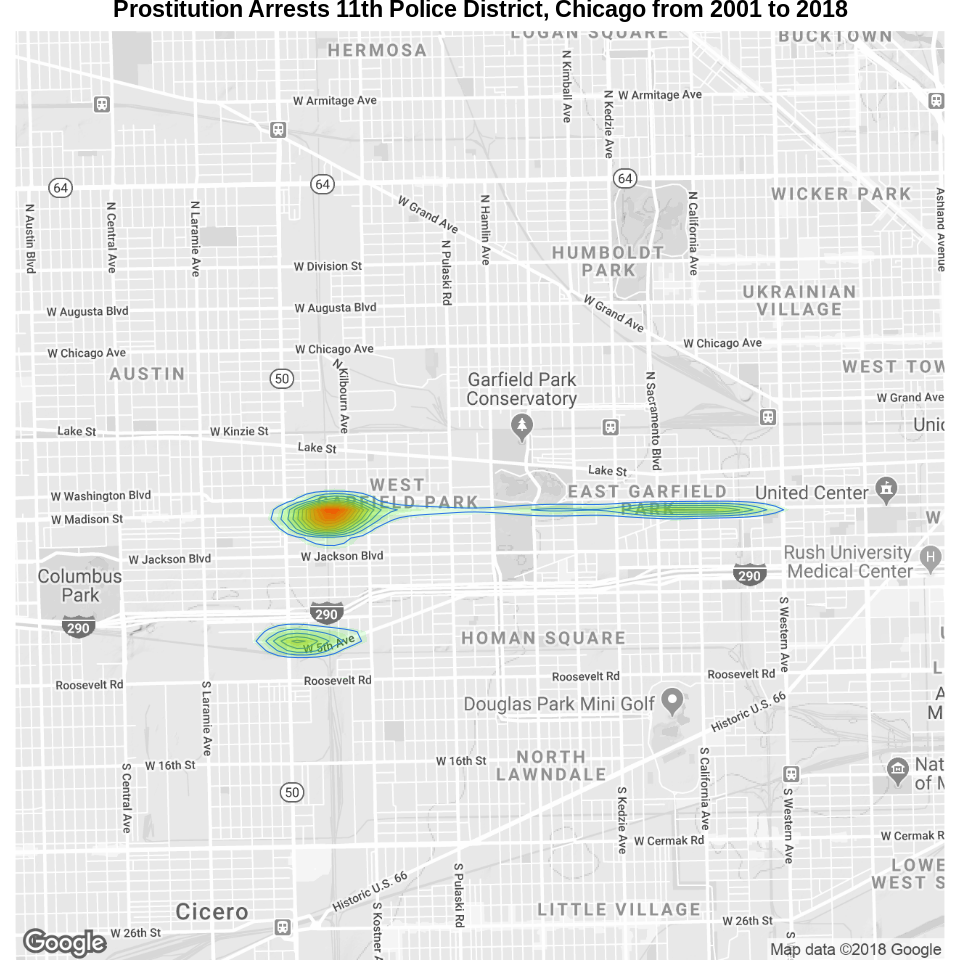

In [76]:
dist_map +
geom_density2d(data = eleven_pros, aes(x = Longitude, y = Latitude), size = 0.3) +
stat_density2d(data = eleven_pros, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") +
scale_fill_gradient(low = "green", high = "red") + 
scale_alpha(range = c(0.1, 0.4), guide = FALSE) +
theme(legend.position="none") +
ggtitle("Prostitution Arrests 11th Police District, Chicago from 2001 to 2018") +
theme(plot.title=element_text(size=14, face="bold")) +
theme(plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))

# Forecasting Crime for the 11th District

### Tested a number of forecast models

In [77]:
library(forecast)

In [78]:
acc.tab3 <- readRDS('/home/ferrous/Crime_Case_Study_Data/accuracy_table3.rds')

In [79]:
acc.tab3

ME  RMSE MAE MPE MAPE MASE ACF1 Method Mean    
1  -6 117   82  -6 14   1    0    ess    28.85714
2   2 120   81   0 10   1    0    arima  30.57143
3   3 122   83   0 10   1    0    ses    31.28571
4   0 123   84   1 12   1    0    holt   31.57143
5   0 126   89  -1 11   1    0    drift  32.28571
6   3 126   89   0 11   1    0    naive  32.85714
7   1 154  112   0 13   1    0    spline 40.14286
8 -15 206  129  -4 15   1    1    snaive 47.57143
9   0 244  189 -40 57   1    1    mean   64.57143

The Exponential Smoothing State Method seemed to perform the best

In [80]:
eleven_ym_ts <- readRDS('/home/ferrous/Crime_Case_Study_Data/eleven_ym_ts.rds')

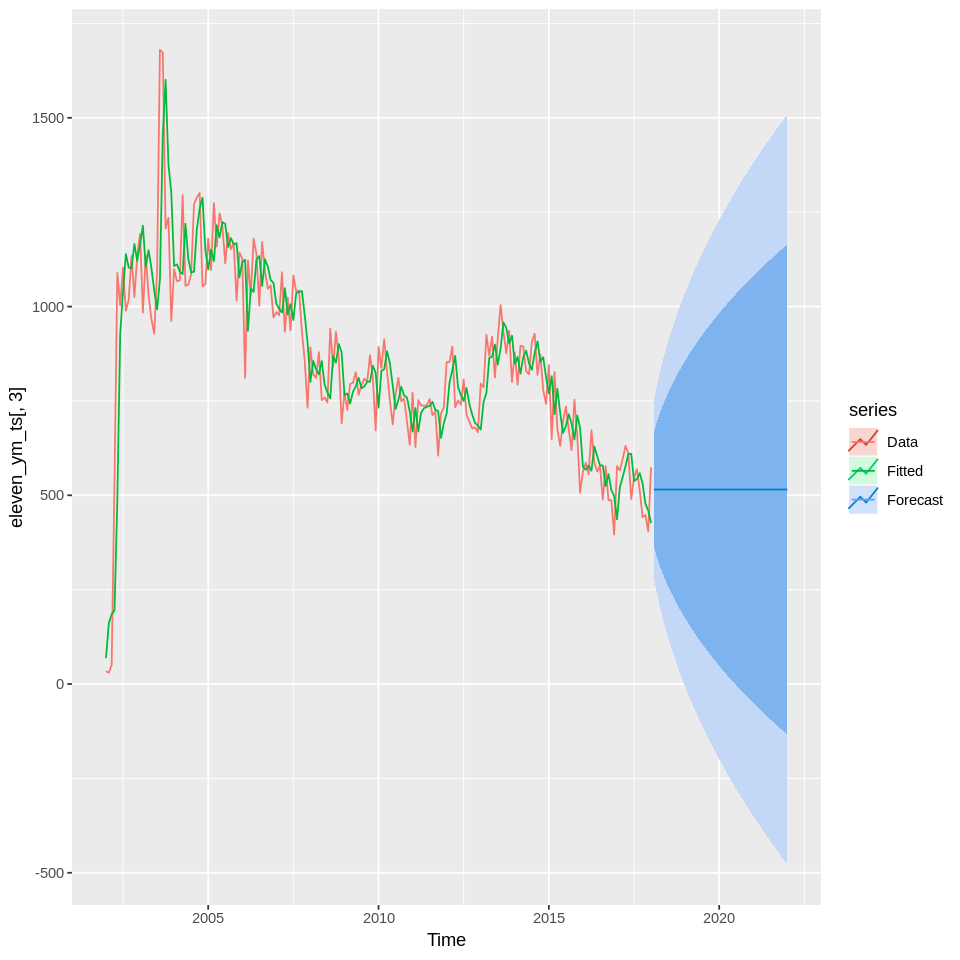

In [81]:
ess <- eleven_ym_ts[,3] %>% ets %>% forecast(h=48)  
autoplot(eleven_ym_ts[,3], series="Data") + 
  autolayer(ess, series="Forecast") + 
  autolayer(fitted(ess), series="Fitted")

In [82]:
ess$model

ETS(A,Ad,N) 

Call:
 ets(y = .) 

  Smoothing parameters:
    alpha = 0.6034 
    beta  = 0.0001 
    phi   = 0.9011 

  Initial states:
    l = -57.7105 
    b = 140.0743 

  sigma:  118.901

     AIC     AICc      BIC 
2867.054 2867.505 2886.630 


	Ljung-Box test

data:  Residuals from ETS(A,Ad,N)
Q* = 49.271, df = 19, p-value = 0.0001677

Model df: 5.   Total lags used: 24



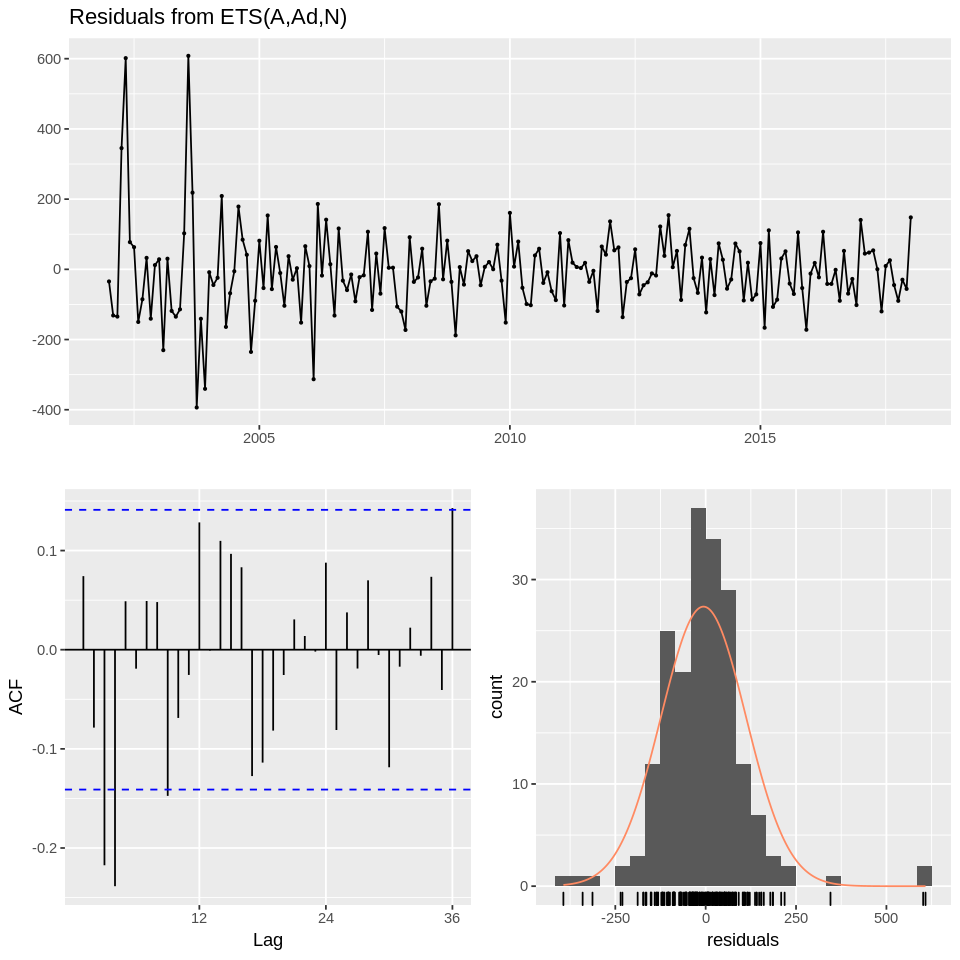

In [83]:
checkresiduals(ess)

We created a Shiny app that compares all models that were tested:  https://ferrouscraddock.shinyapps.io/Crime_Forecast/